In [14]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [15]:
DATASET_PATH = 'dataset'
X_train, y_train = [], []
X_val, y_val = [], []
X_test, y_test = [], []

for split in ['train', 'test', 'val']:
    split_path = os.path.join(DATASET_PATH, split)
    
    if not os.path.exists(split_path):
        print(f"No existe la carpeta: {split_path}")
        continue
    
    # Recorrer las clases dentro de cada split
    for label in os.listdir(split_path):
        class_folder = os.path.join(split_path, label)
        
        if not os.path.isdir(class_folder):
            continue
        
        # Recorrer las imágenes de cada clase
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            
            # Leer la imagen
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"No se pudo leer: {img_path}")
                continue
            
            # Preprocesar
            img = cv2.resize(img, (128, 128))
            
            # Extraer características HOG
            features = hog(
                img,
                orientations=9,
                pixels_per_cell=(16, 16),
                cells_per_block=(2, 2),
                feature_vector=True
            )
            
            # Asignar según el split
            if split == 'train':
                X_train.append(features)
                y_train.append(label)
            elif split == 'val':
                X_val.append(features)
                y_val.append(label)
            elif split == 'test':
                X_test.append(features)
                y_test.append(label)

# Convertir a arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

#### Entrenamiento del modelo

In [16]:
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


#### Validación

In [17]:
y_pred_val = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.9375


#### Test

In [18]:
y_pred_test = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy}')
print("Report", classification_report(y_test, y_pred_test))

Test Accuracy: 0.9375
Report               precision    recall  f1-score   support

    AAlegria       1.00      1.00      1.00         1
       ALara       0.50      1.00      0.67         1
      ASaula       1.00      1.00      1.00         1
    BPepinos       1.00      1.00      1.00         1
  CCalapucha       1.00      1.00      1.00         1
     EChuico       1.00      1.00      1.00         1
   EZambrano       1.00      1.00      1.00         1
    FJimenez       1.00      1.00      1.00         1
   HQuintero       1.00      1.00      1.00         1
     JFranco       1.00      1.00      1.00         1
     JGuerra       1.00      1.00      1.00         1
    JJimenez       0.00      0.00      0.00         1
     JTorres       1.00      1.00      1.00         1
     MMolina       1.00      1.00      1.00         1
      PTapia       1.00      1.00      1.00         1
 RPuruncajas       1.00      1.00      1.00         1

    accuracy                           0.94        

c:\Users\Adonis\Documents\6 NIVEL\INTELIGENCIA ARTIFICIAL\P3\Practica3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Adonis\Documents\6 NIVEL\INTELIGENCIA ARTIFICIAL\P3\Practica3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Adonis\Documents\6 NIVEL\INTELIGENCIA ARTIFICIAL\P3\Practica3\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `

<H4> Entrenamiento de varios modelos</H4>

In [19]:
# Entrenamiento de modelos
models = [
    {'name': 'Random Forest', 'model': RandomForestClassifier(n_estimators=100, random_state=42)},
    {'name': 'Redes Neuronales', 'model': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)},
    {'name': 'Logistic Regression', 'model': LogisticRegression(max_iter=1000, random_state=42)},
    {'name': 'Gradient Boosting', 'model': GradientBoostingClassifier(n_estimators=100, random_state=42)},
    {'name': 'k-Nearest Neighbors', 'model': KNeighborsClassifier(n_neighbors=5)}
]

# Entrenar los modelos
for m in models:
    m['model'].fit(X_train, y_train)

# Evaluar en test y encontrar el mejor
best_model = None
best_accuracy = 0
for m in models:
    y_pred = m['model'].predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    m['accuracy'] = acc
    print(f"{m['name']}: Test Accuracy = {acc}")
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = m

print(f"\nMejor modelo: {best_model['name']} con accuracy {best_accuracy}")

# Modelo seleccionado (inicialmente el mejor)
selected_model = best_model['model']

Random Forest: Test Accuracy = 0.9375
Redes Neuronales: Test Accuracy = 0.875
Logistic Regression: Test Accuracy = 0.9375
Gradient Boosting: Test Accuracy = 0.4375
k-Nearest Neighbors: Test Accuracy = 0.875

Mejor modelo: Random Forest con accuracy 0.9375


In [20]:
for m in models:
    y_pred_val = m['model'].predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    print(f'{m["name"]} - Validation Accuracy: {val_accuracy}')

Random Forest - Validation Accuracy: 0.9375
Redes Neuronales - Validation Accuracy: 0.9375
Logistic Regression - Validation Accuracy: 0.9375
Gradient Boosting - Validation Accuracy: 0.5
k-Nearest Neighbors - Validation Accuracy: 0.90625


#### Predicción en una nueva imagen

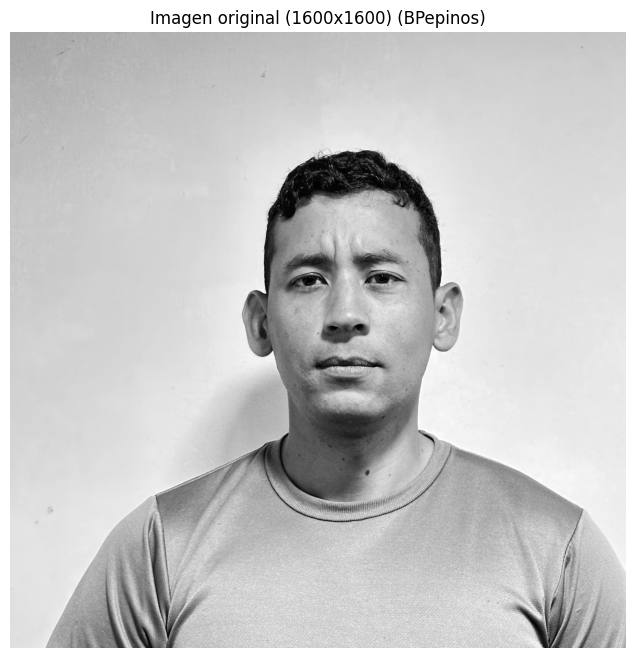

In [32]:
def predict_image(image_path):
    # Leer imagen original
    image_original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image_original is None:
        return "Imagen no encontrada o inválida"
    
    # Mostrar imagen
    plt.figure(figsize=(8, 8))
    plt.imshow(image_original, cmap='gray')
    plt.title(f'Imagen original ({image_original.shape[1]}x{image_original.shape[0]}) ({resultado})')
    plt.axis('off')
    plt.show()
    
    # Redimensionar solo para predicción
    image_resized = cv2.resize(image_original, (128, 128))
    features = hog(image_resized, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), feature_vector=True)
    prediction = clf.predict([features])
    return prediction[0]

resultado = predict_image(
r"C:\Users\Adonis\Documents\6 NIVEL\INTELIGENCIA ARTIFICIAL\P3\Practica3\Lab2_AlegriaAdonis\DATASET\test\BPepinos\img_10.jpeg")